In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise
import seaborn as sns
import os
os.chdir(r'C:\Users\Venia\Desktop\reddit_music')

# these datasets were removed. The link to them will be added later. 
words = pd.read_table('data\\wfc_vecs_1575657682.tsv', names=list(range(150)))
metadata= pd.read_table('data\\wfc_meta_1575657682.tsv')

data=pd.merge(words,metadata, left_index=True,right_index=True)

data.index=data['word']

data.drop(['word','type'],axis=1,inplace=True)

genre_vectors= pd.read_csv("data\\short_vectors.csv")
genre_names = pd.read_csv("data\\genre_names_f.csv")
# genre_vectors['short']= genre_vectors['genre']
genre_names['short']=genre_names['short'].fillna(genre_names['genre'])
genre_vectors=pd.merge(genre_vectors, genre_names[['label','short']])
genre_vectors.drop('label',axis=1,inplace=True)
genre_vectors.index = genre_vectors['short']
genre_vectors.drop(['short'],axis=1, inplace= True)

In [29]:
from matplotlib.colors import ListedColormap
cmap = sns.color_palette('viridis', desat=.6, n_colors=5)
my_cmap = ListedColormap(cmap.as_hex())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


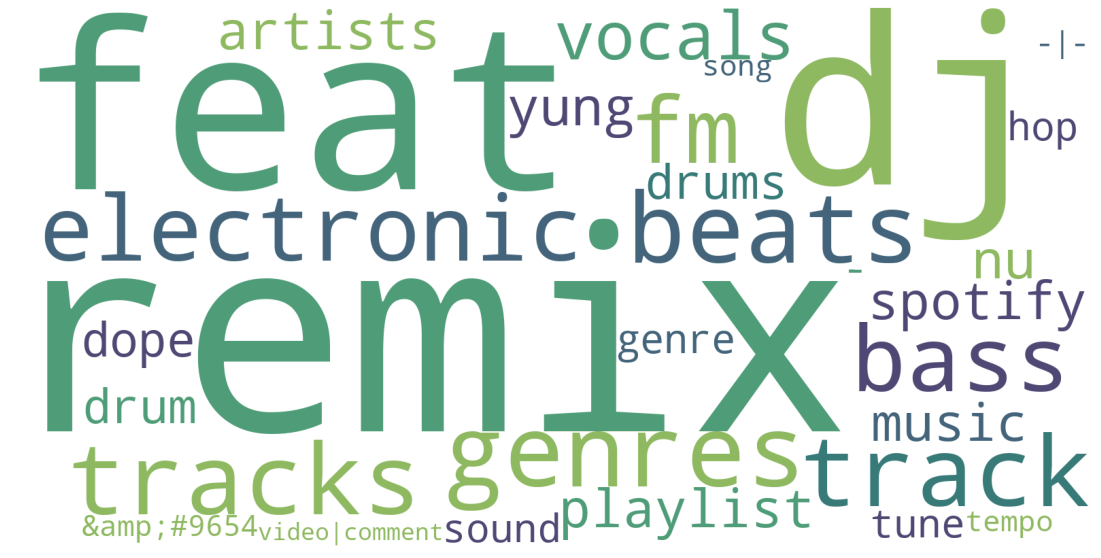

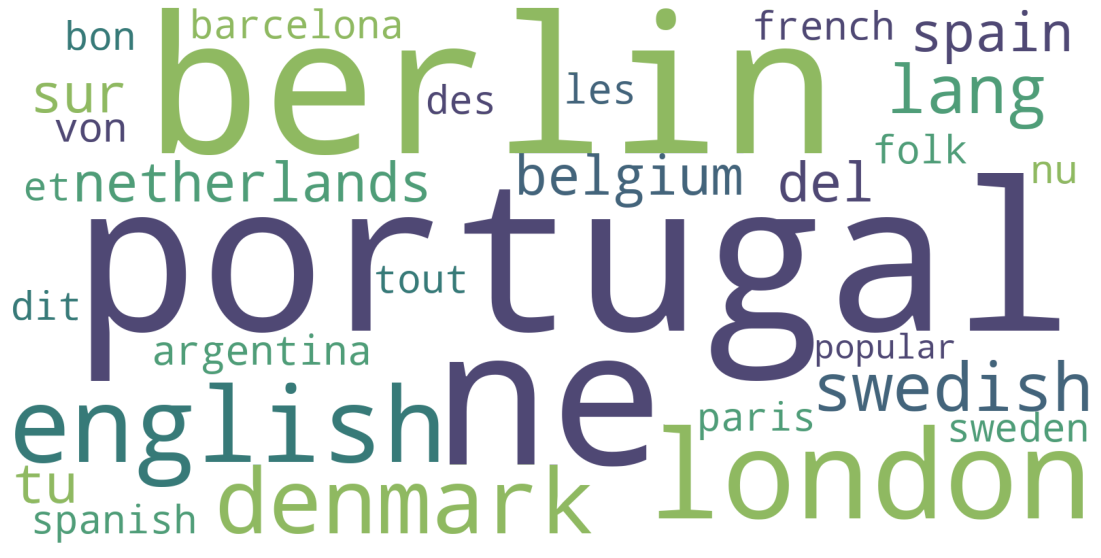

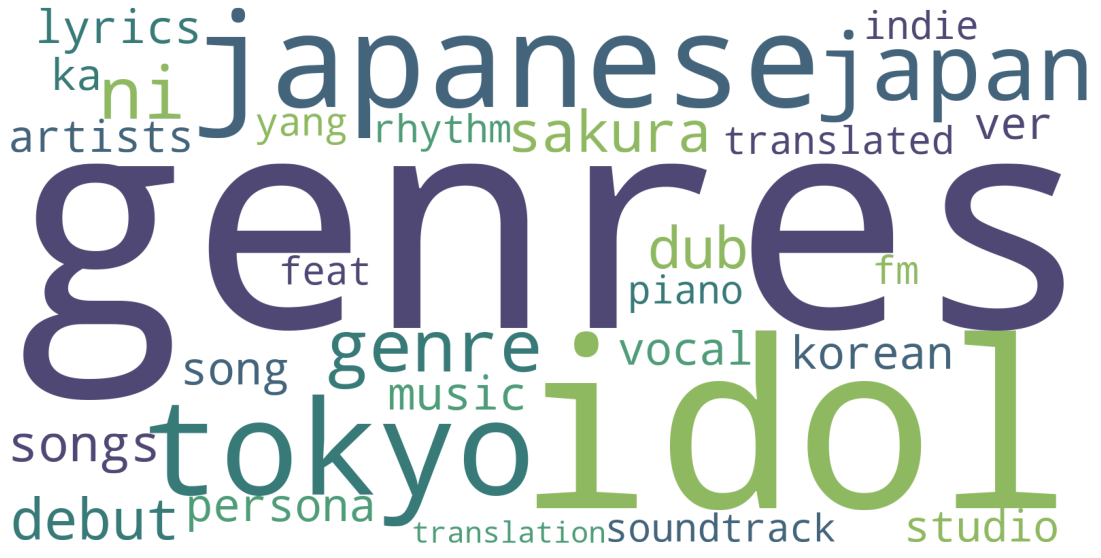

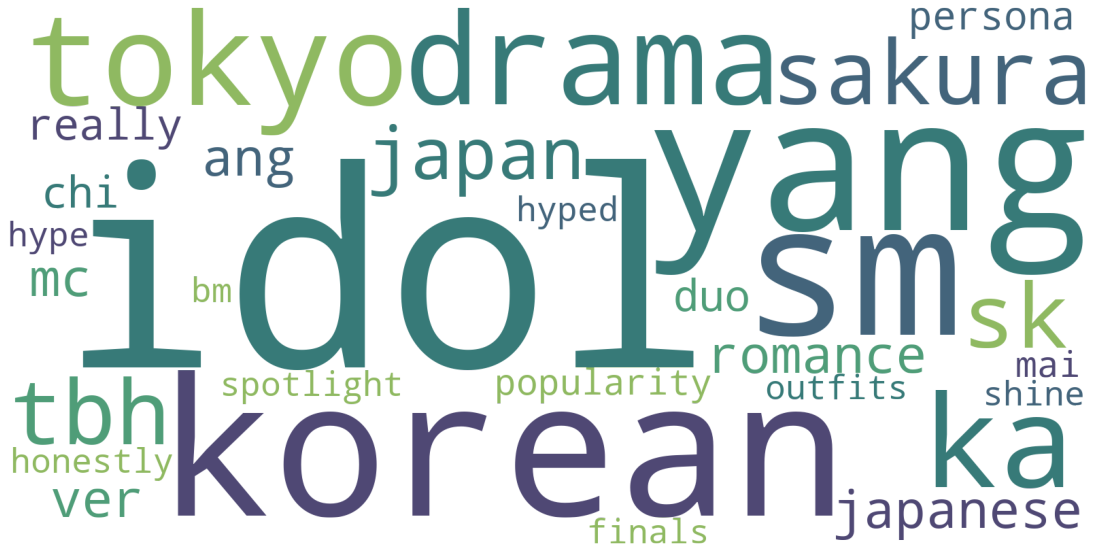

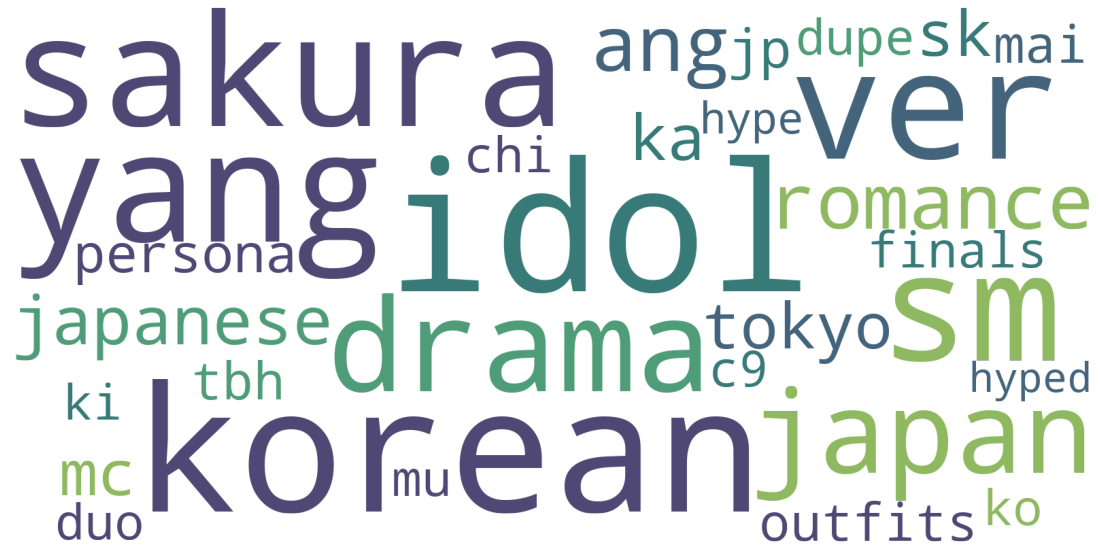

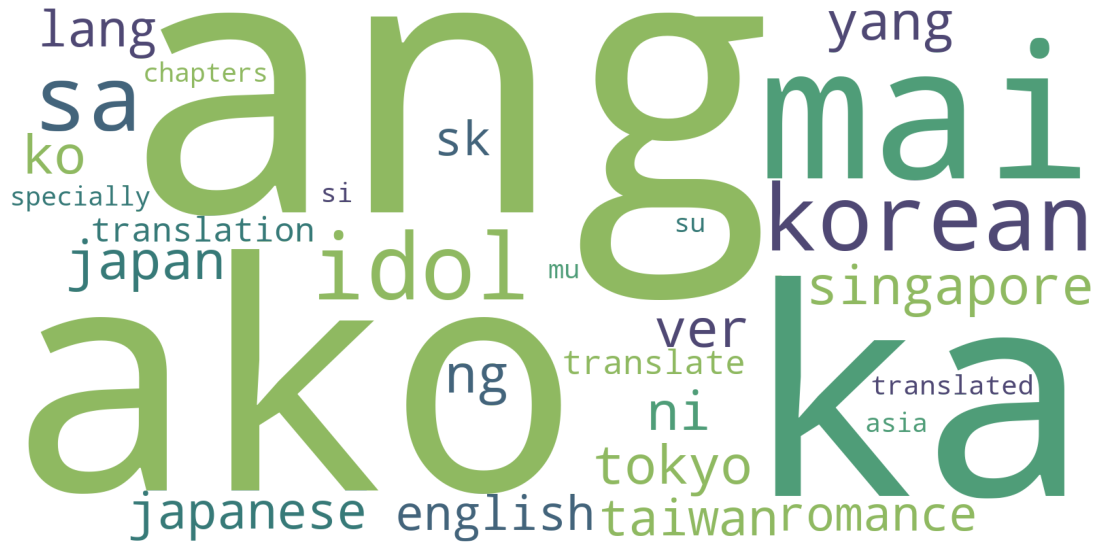

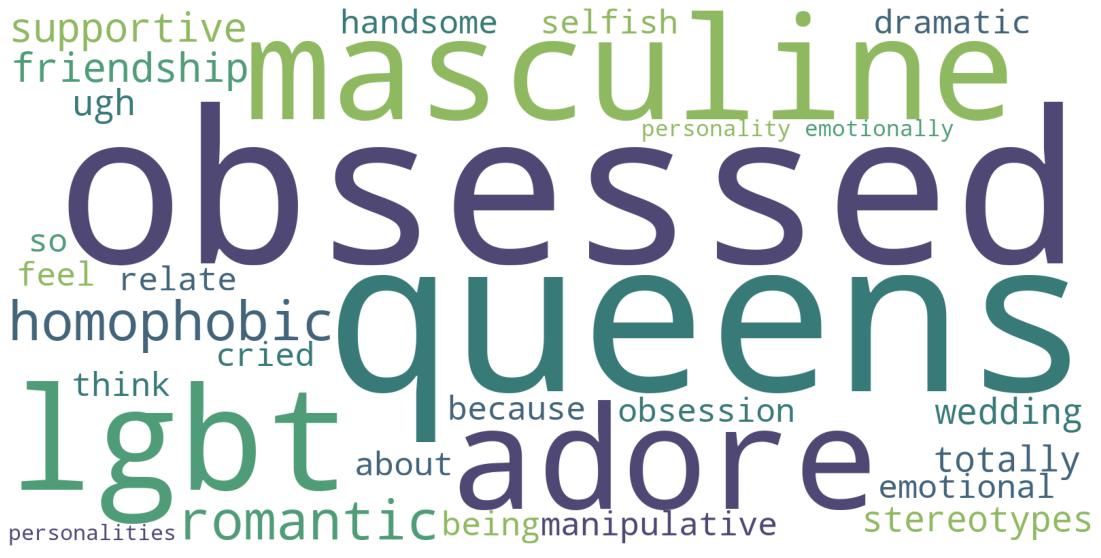

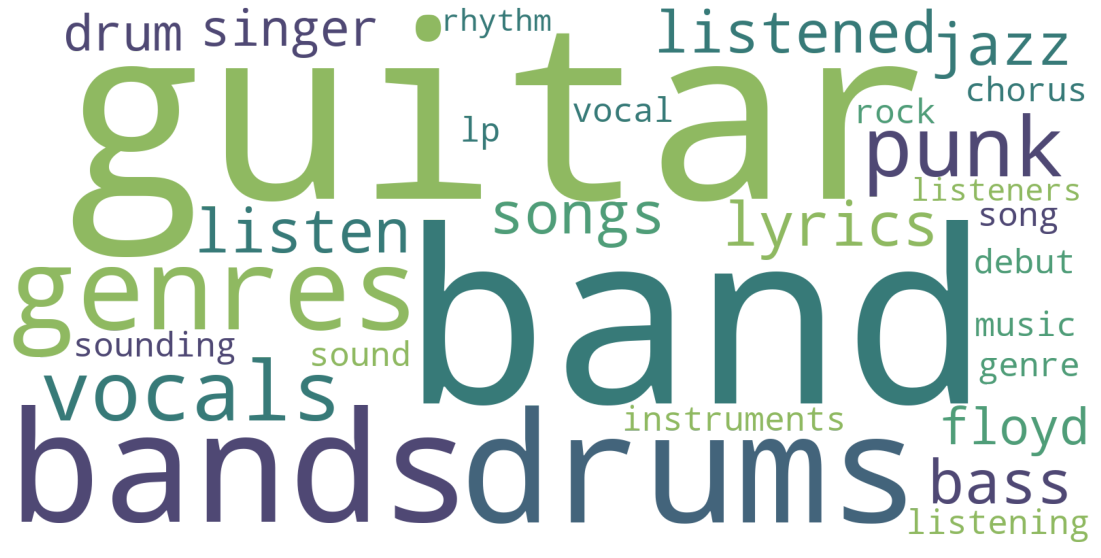

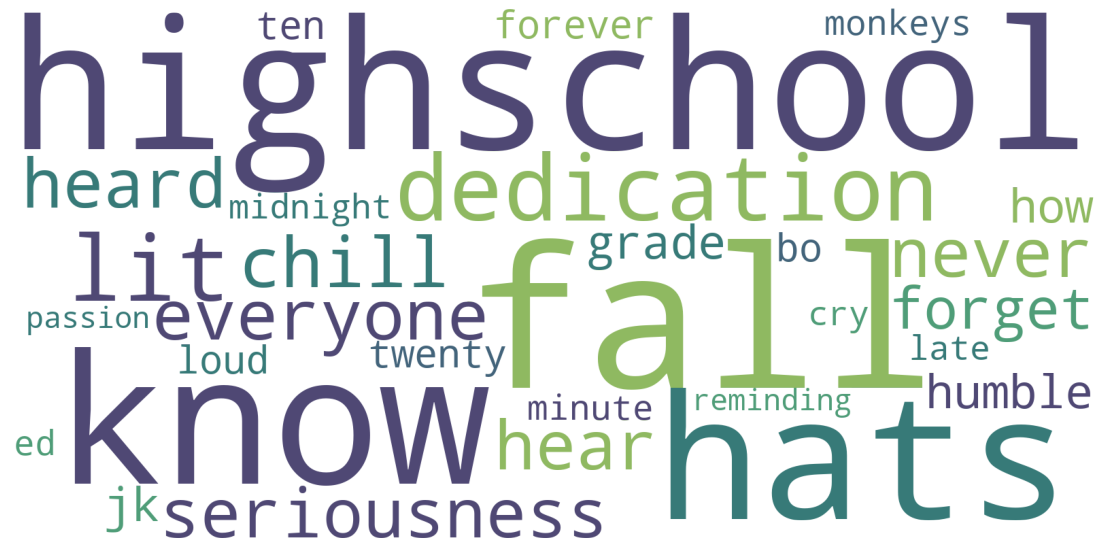

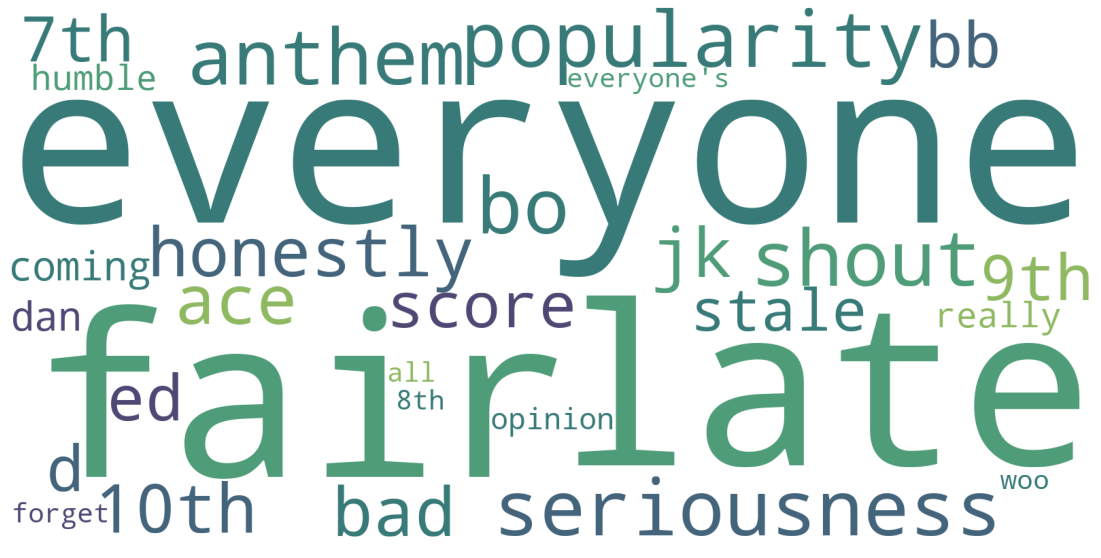

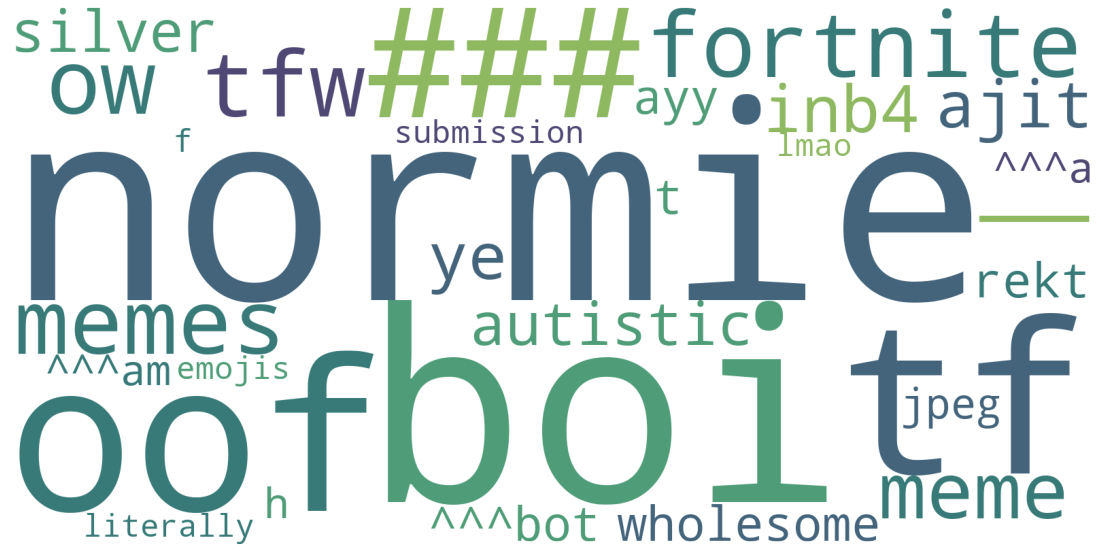

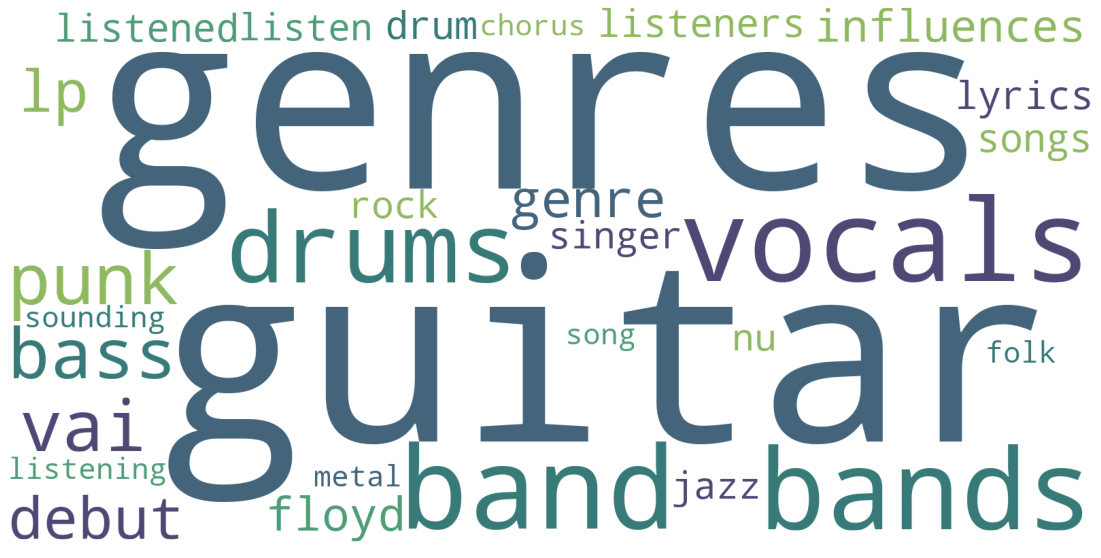

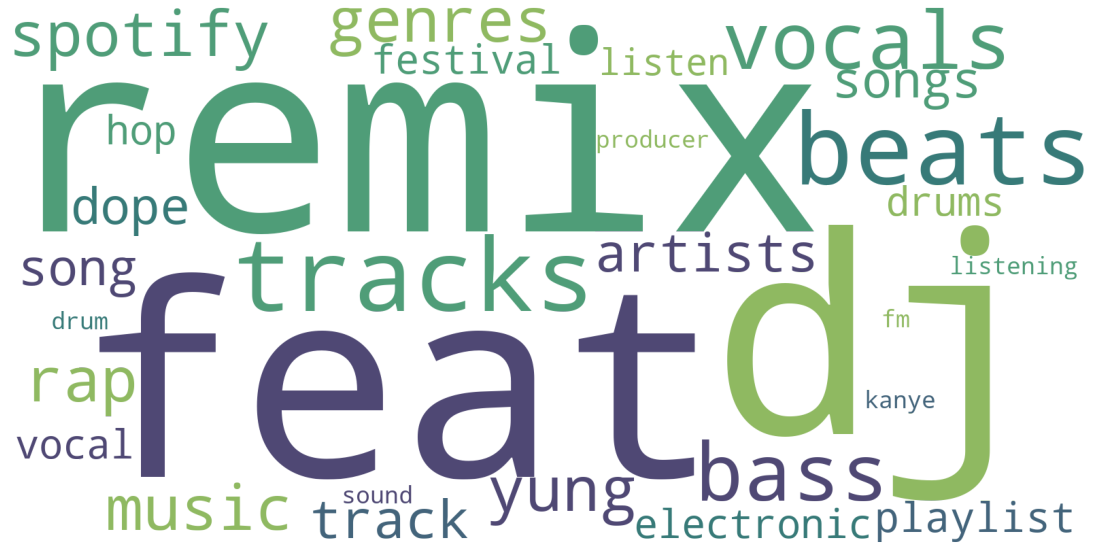

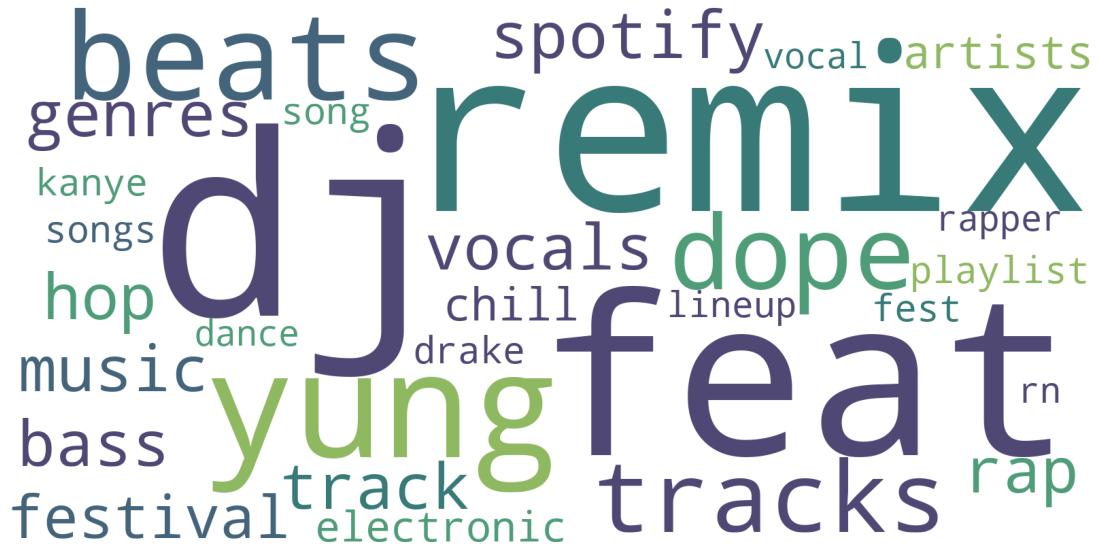

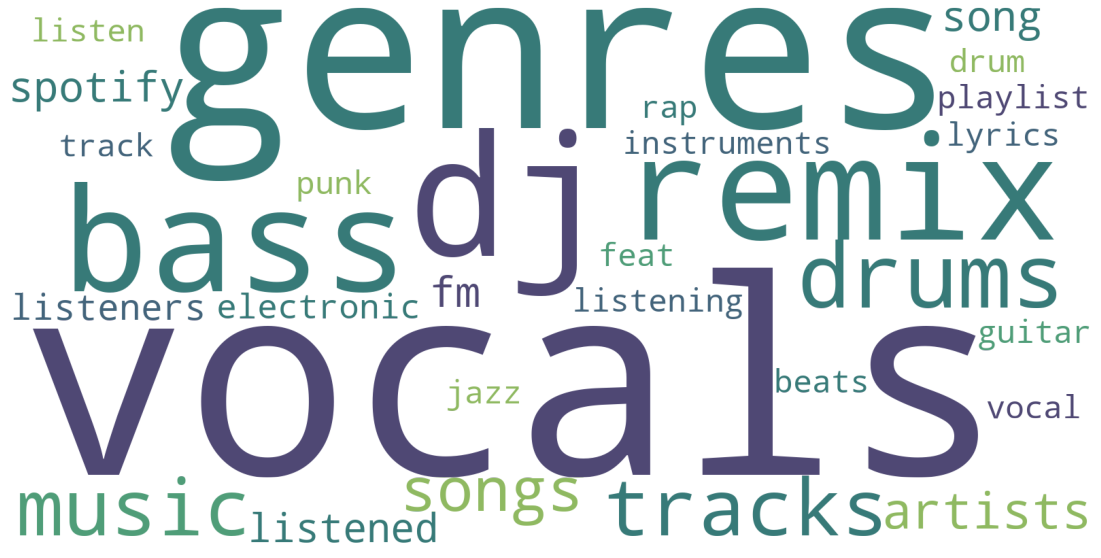

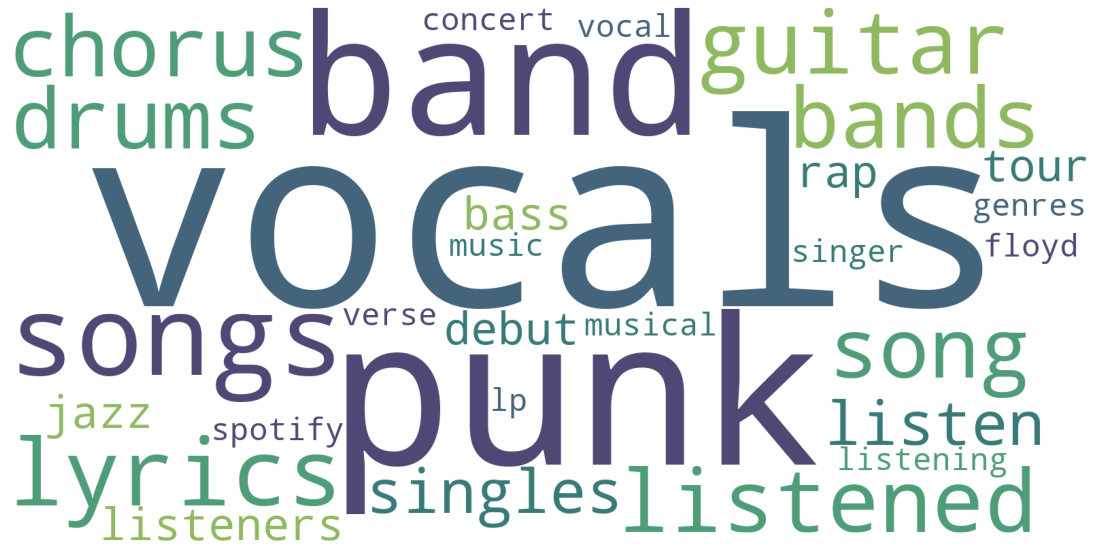

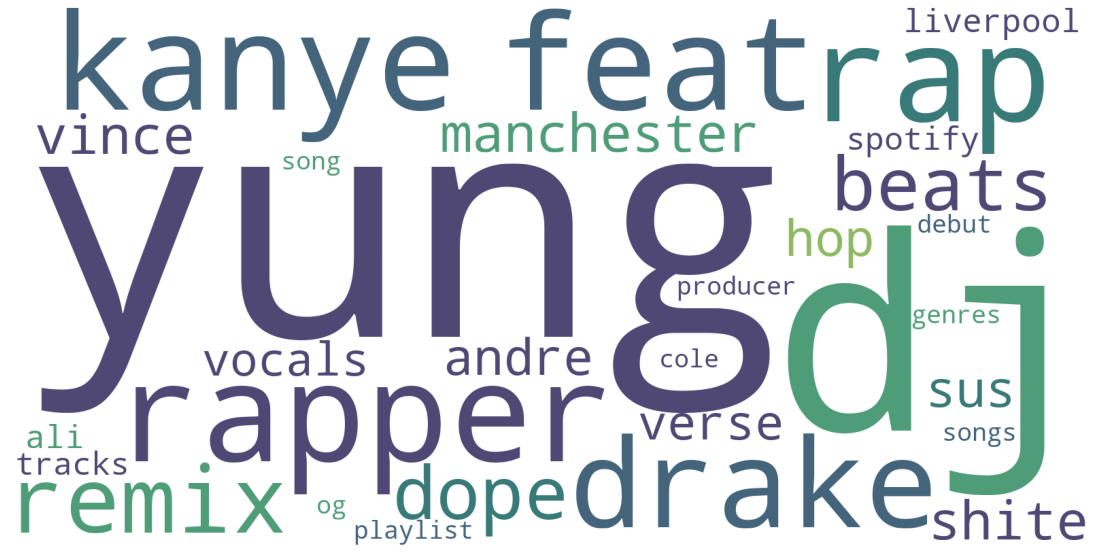

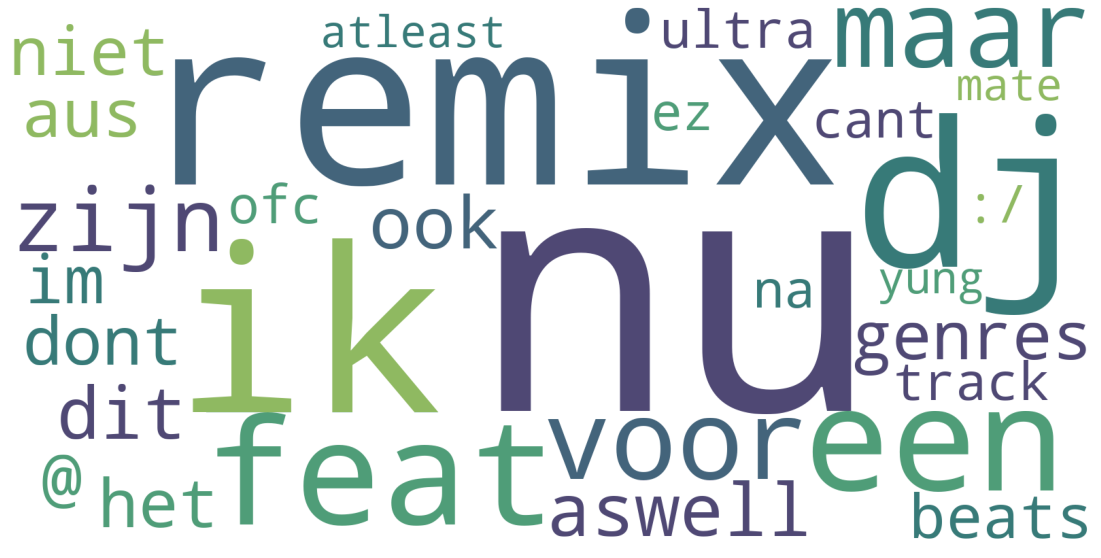

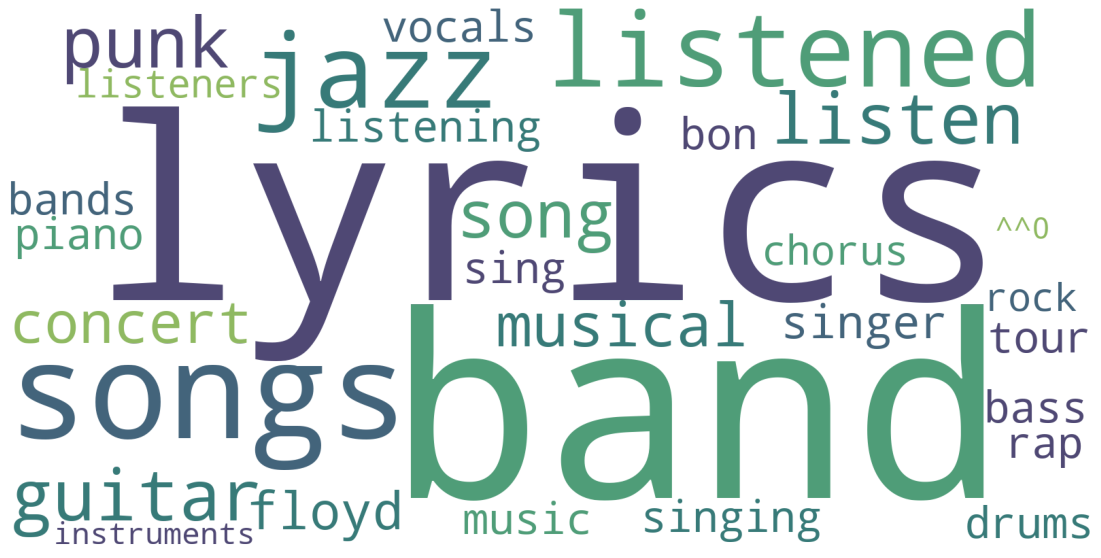

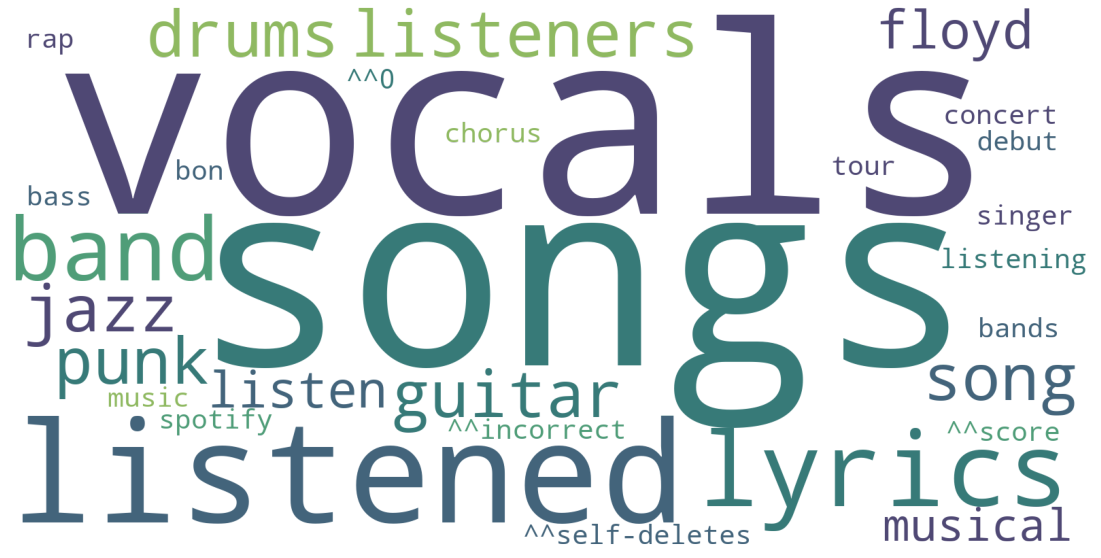

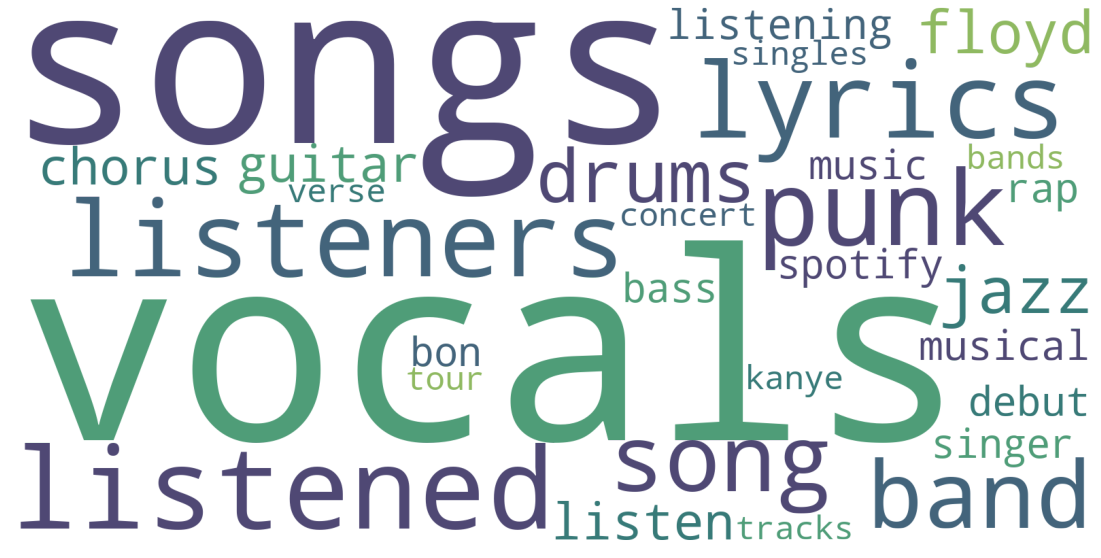

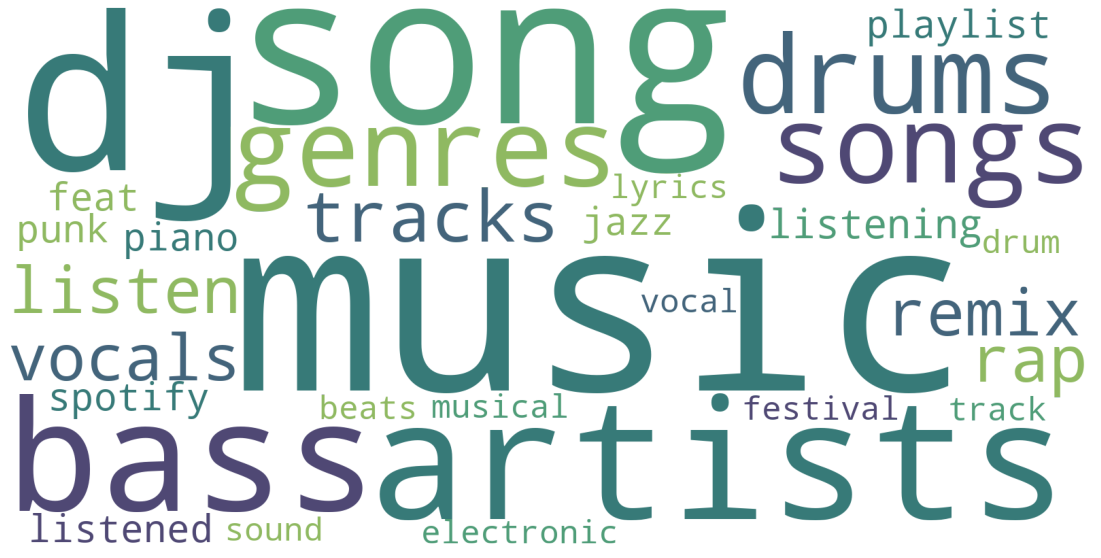

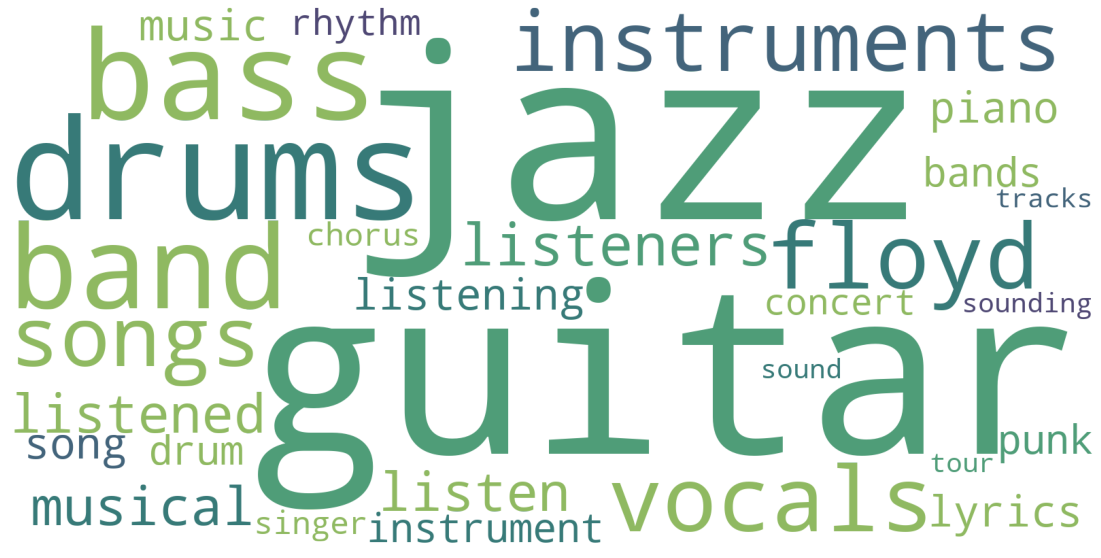

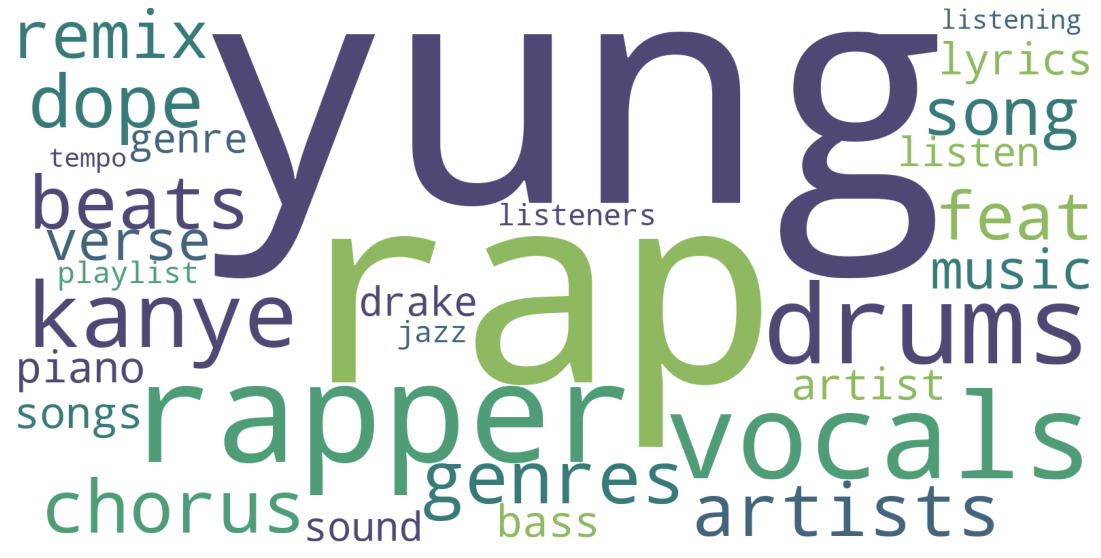

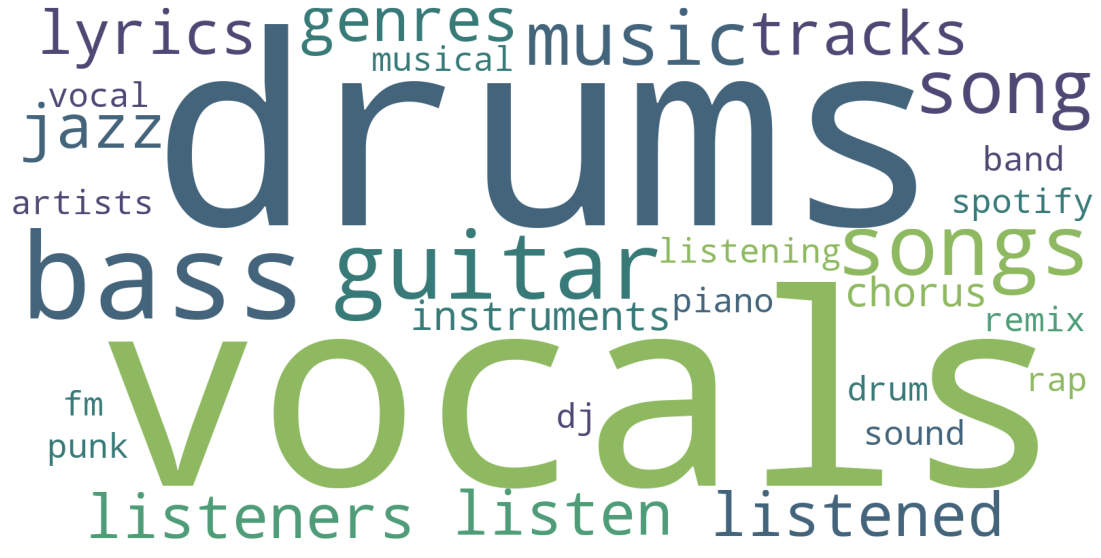

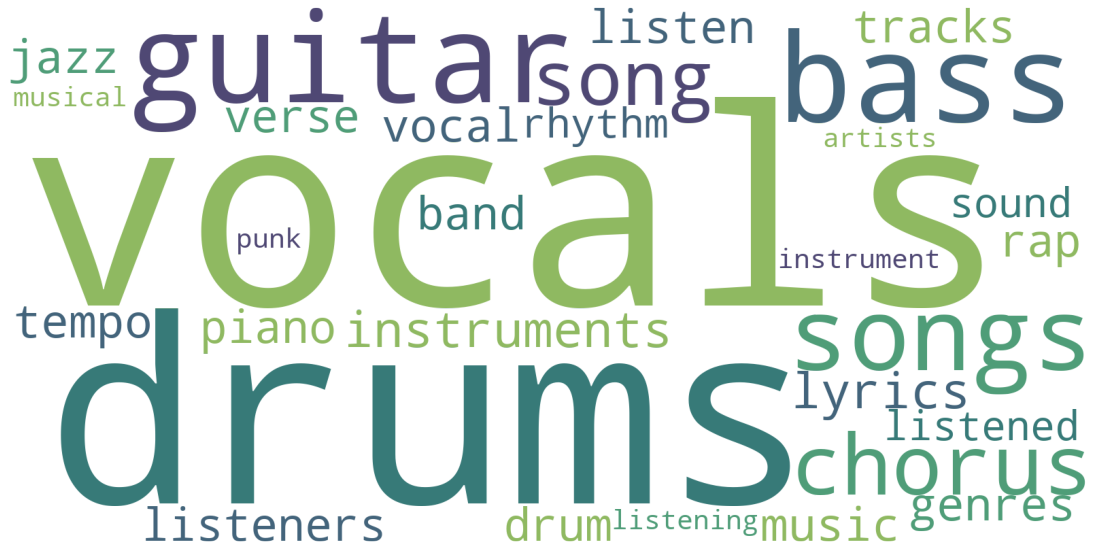

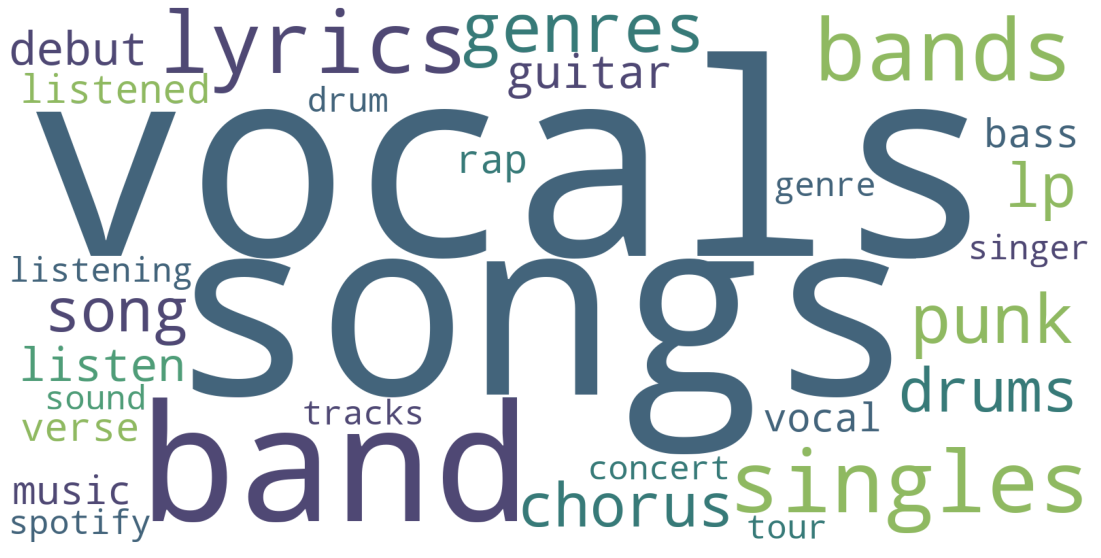

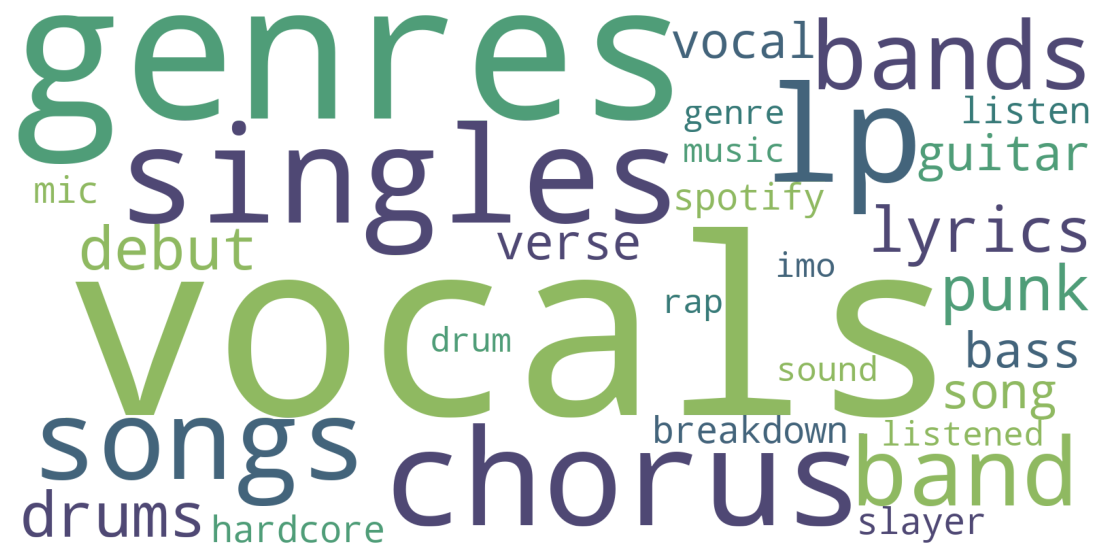

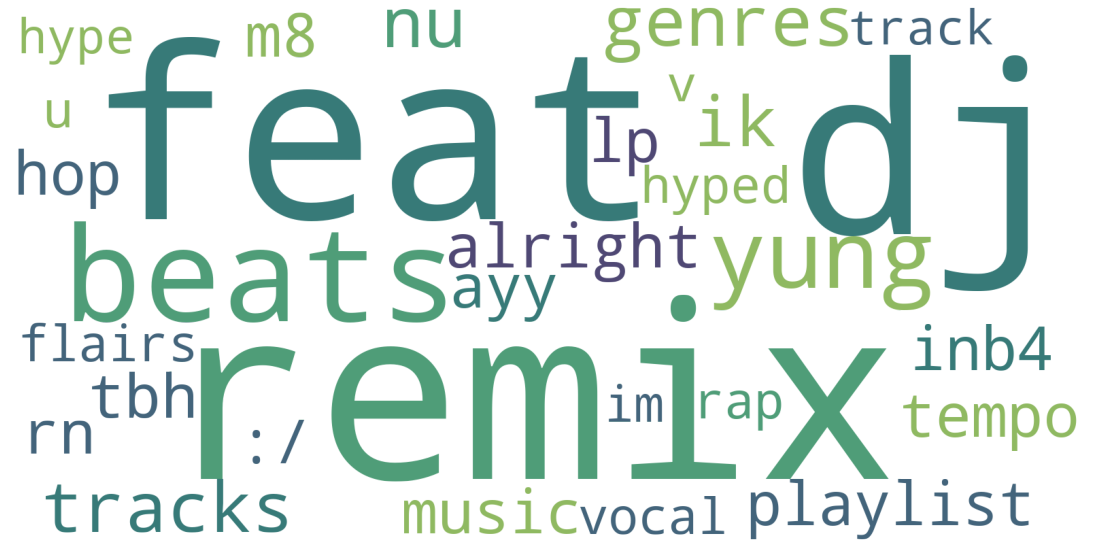

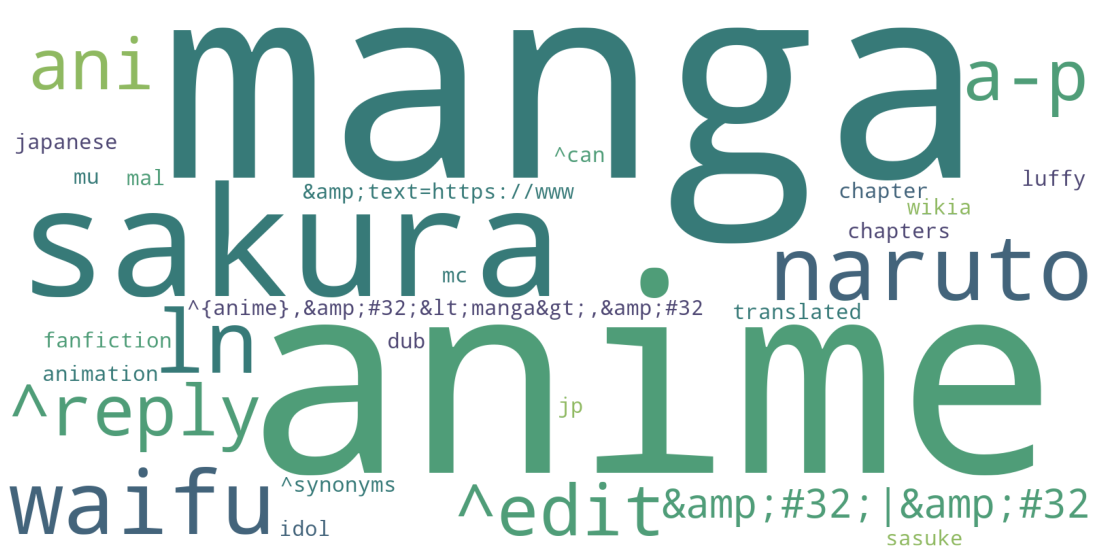

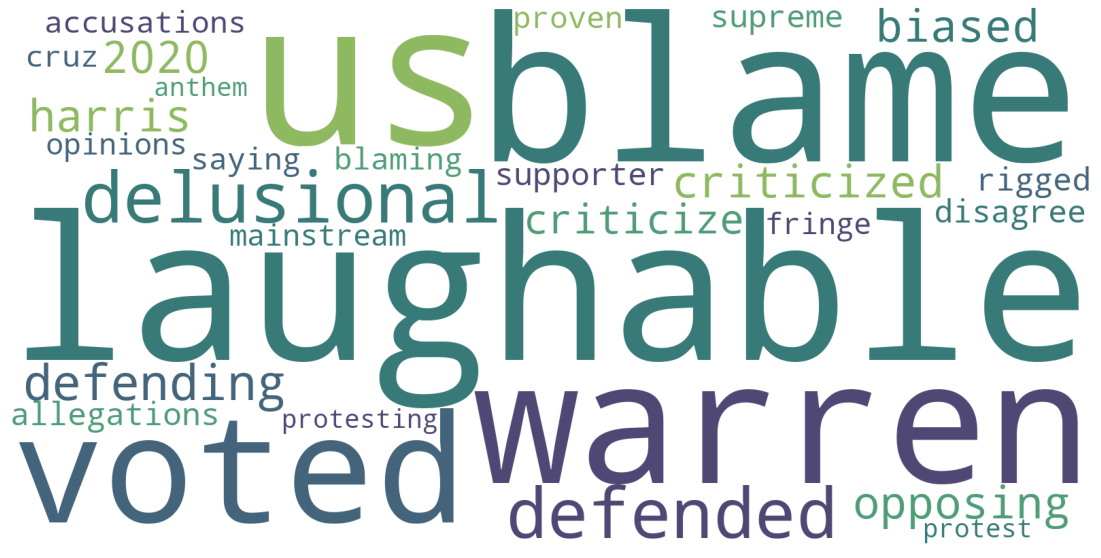

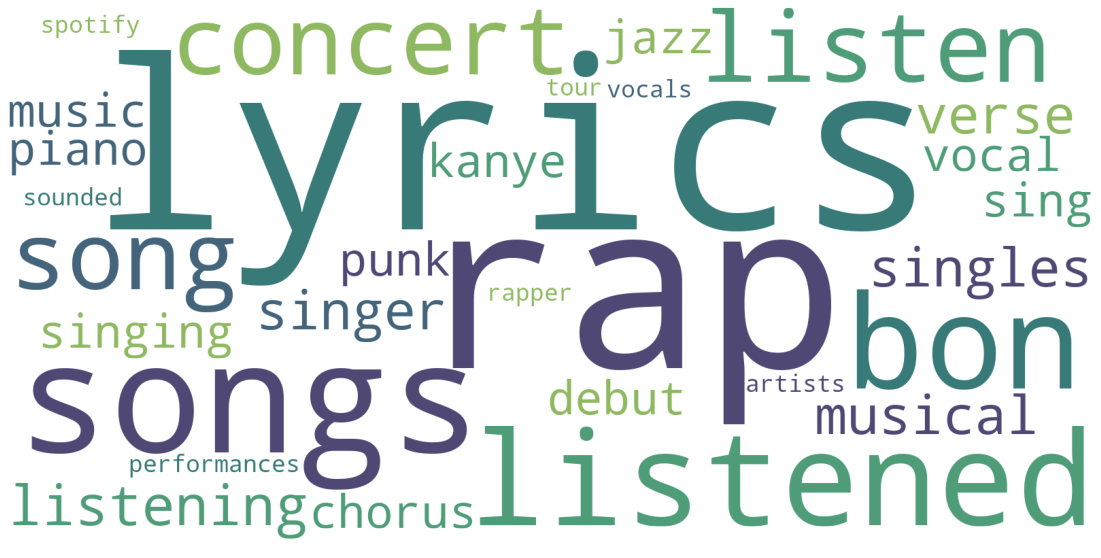

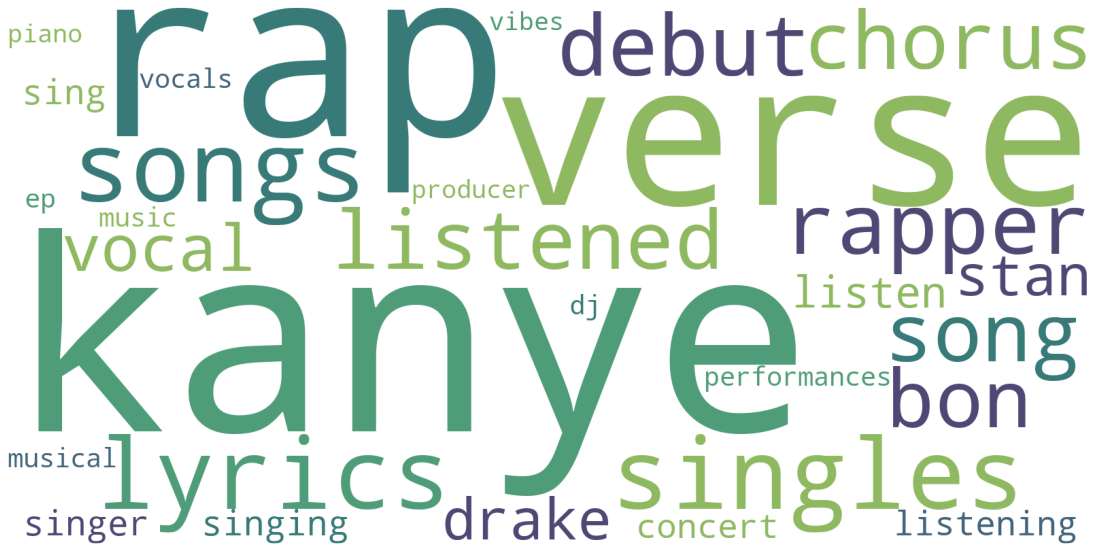

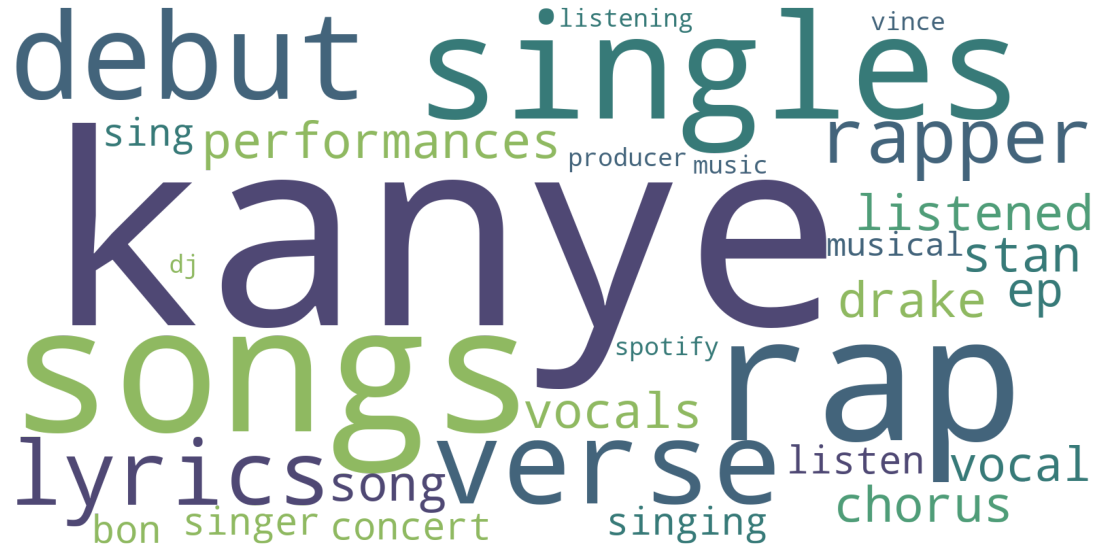

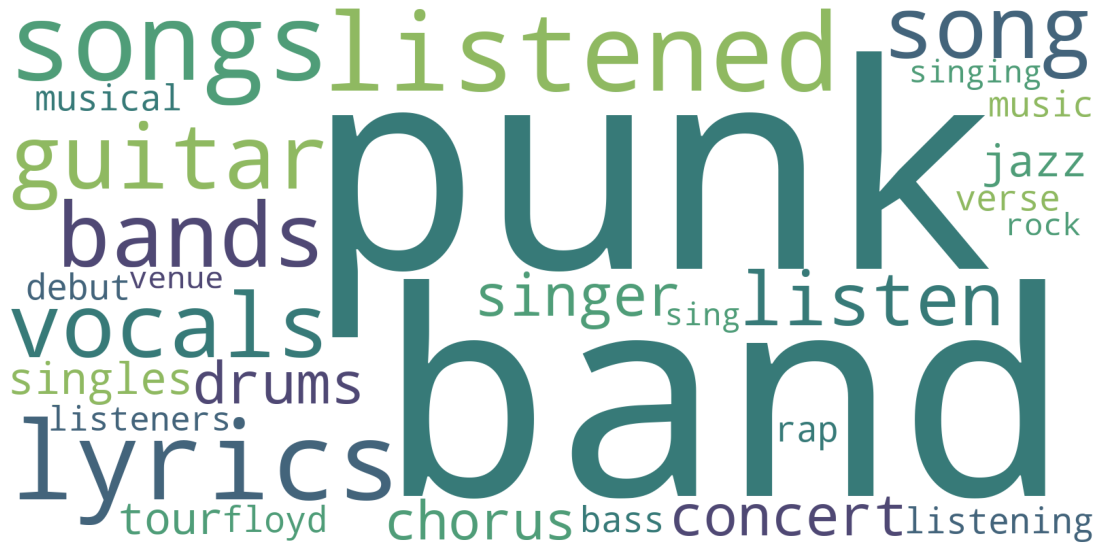

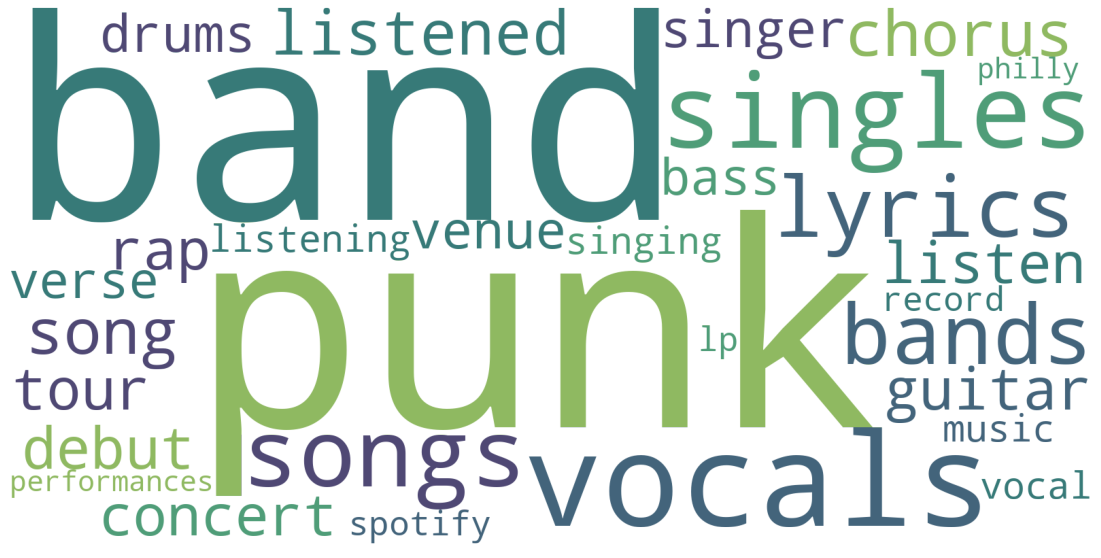

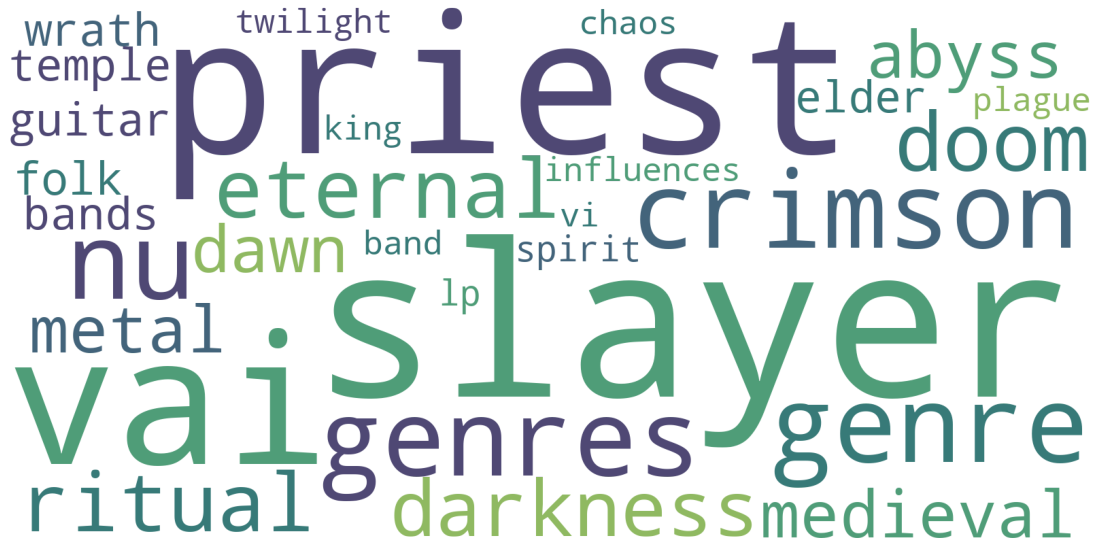

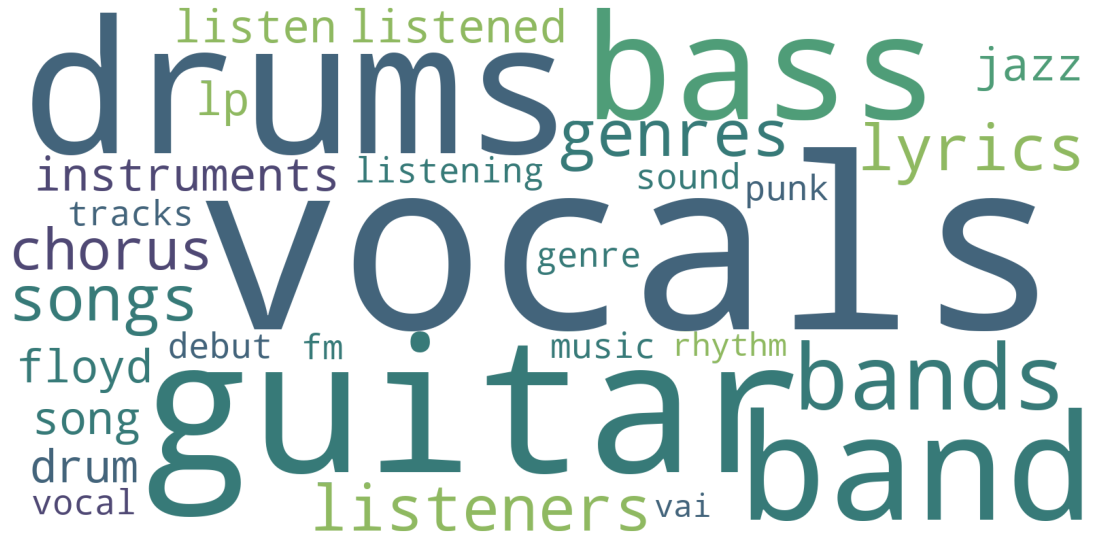

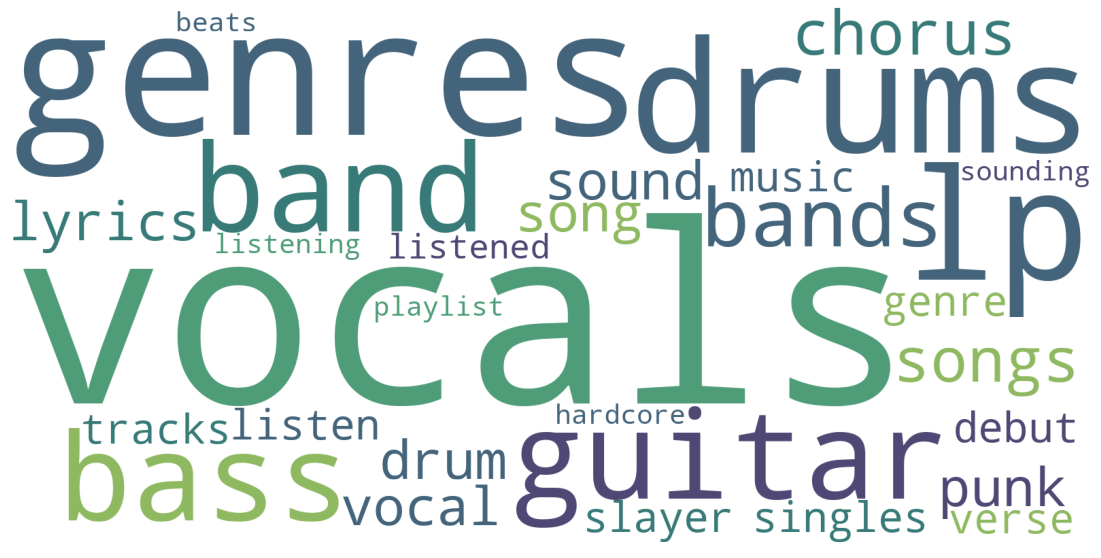

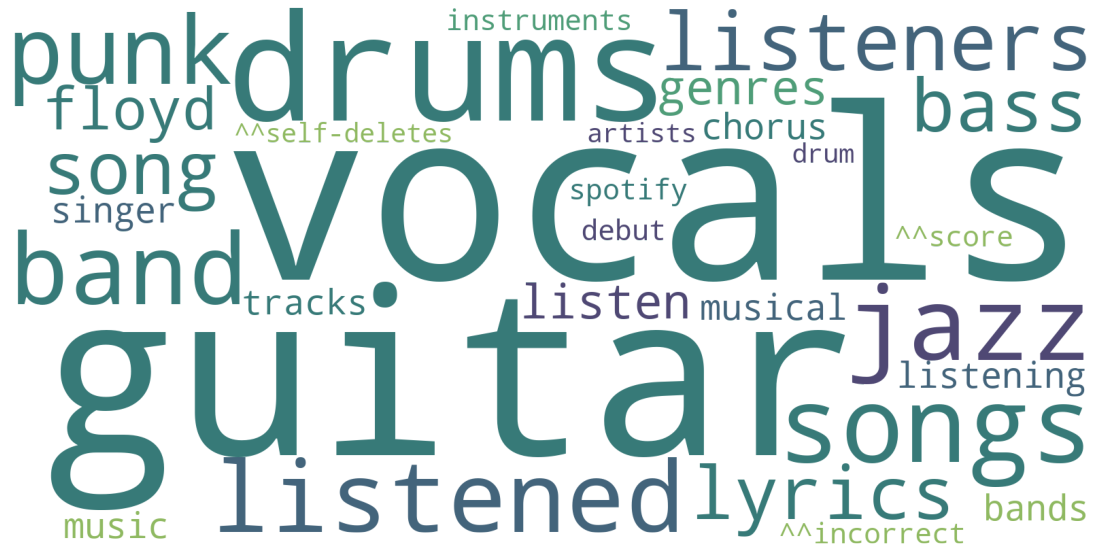

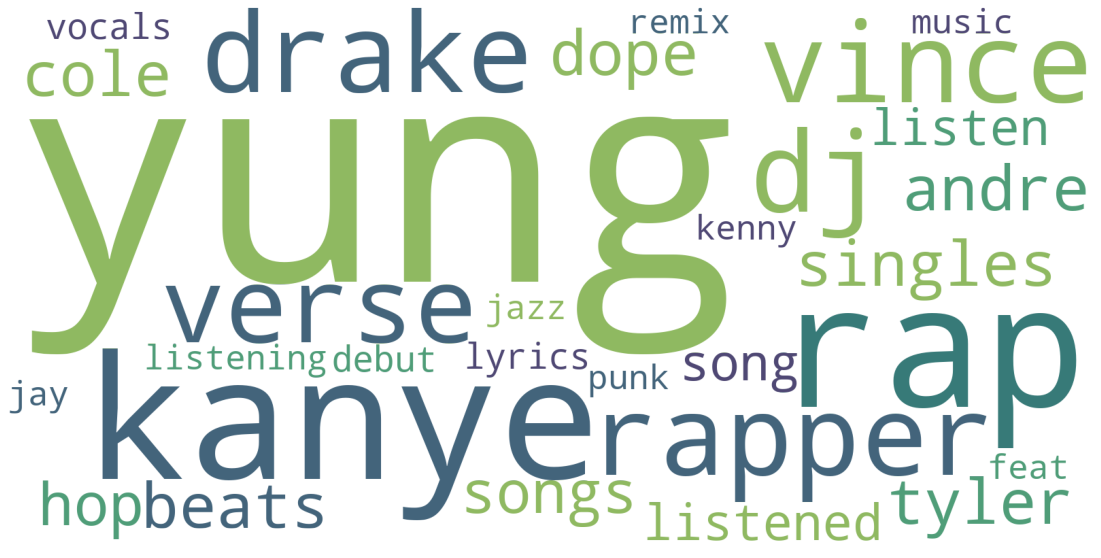

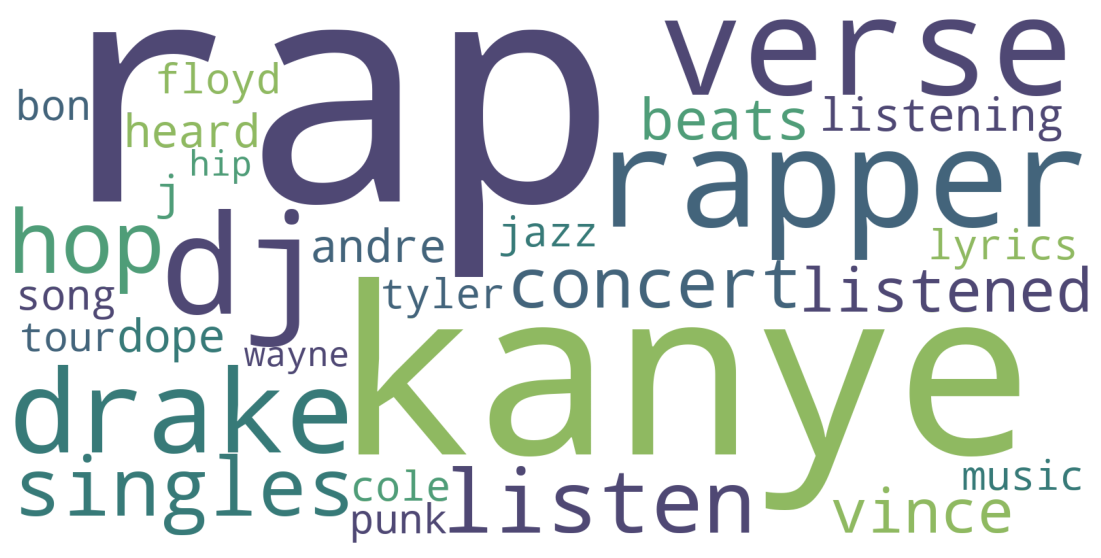

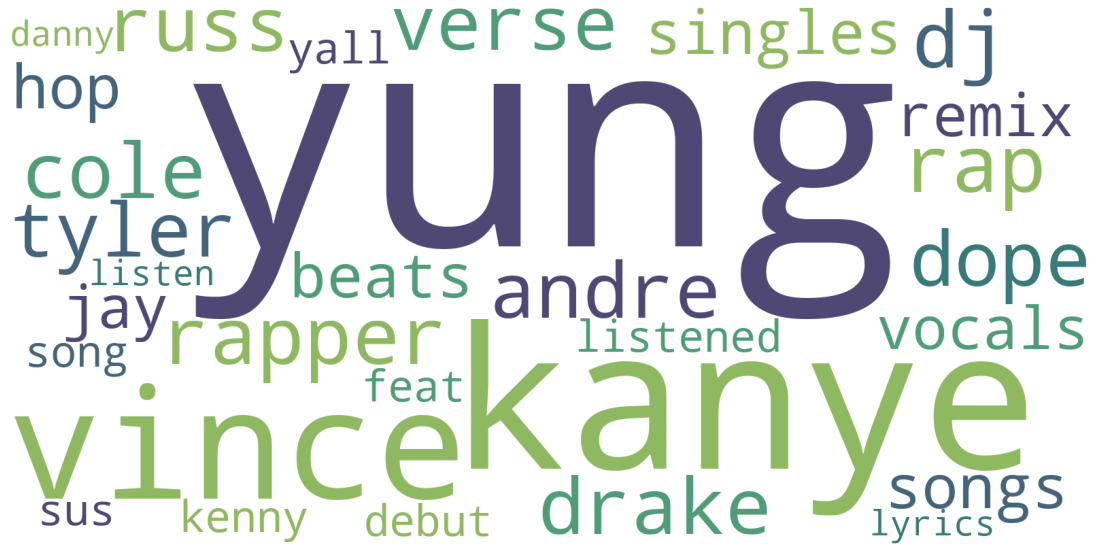

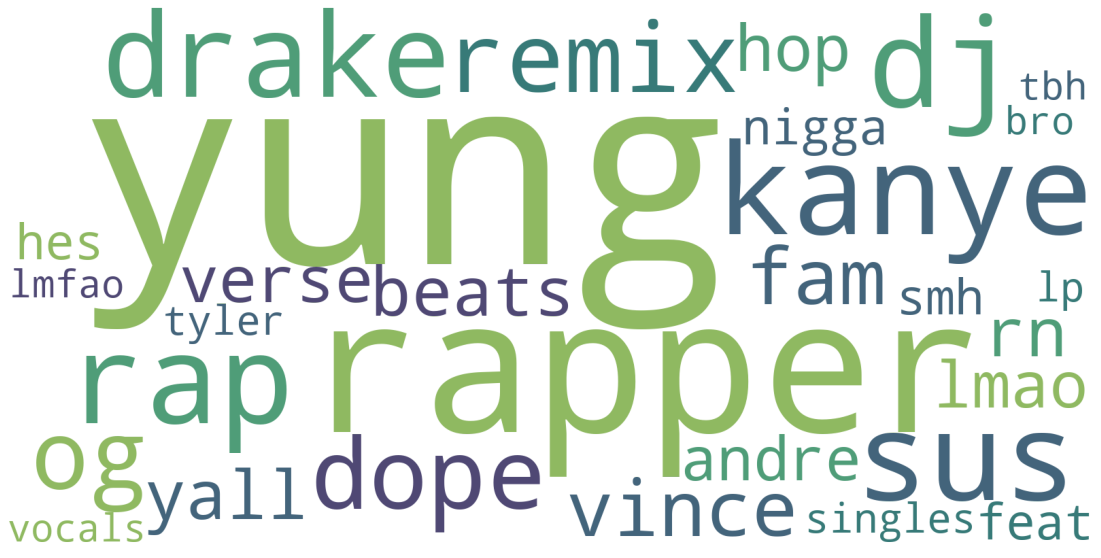

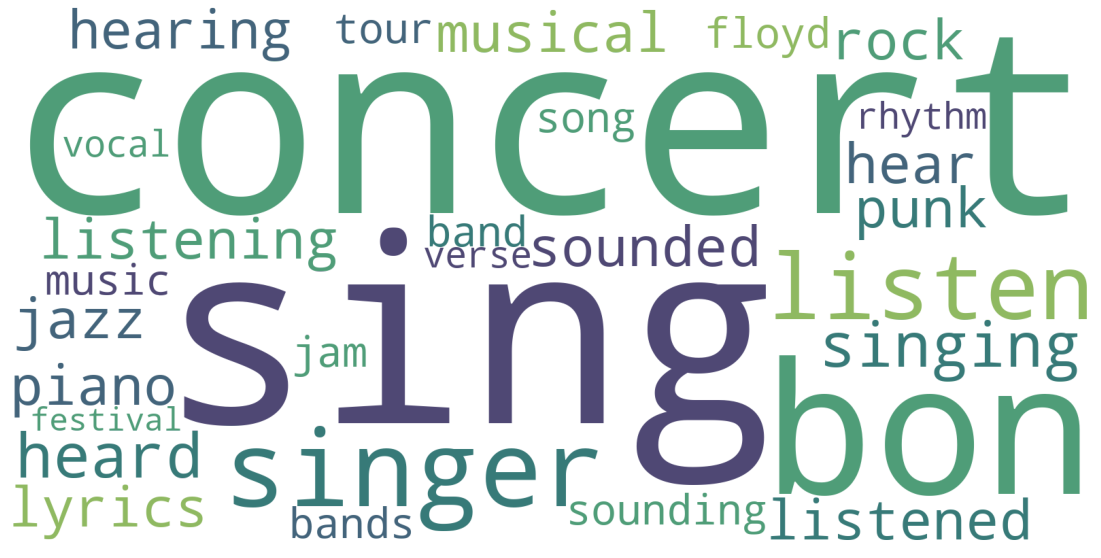

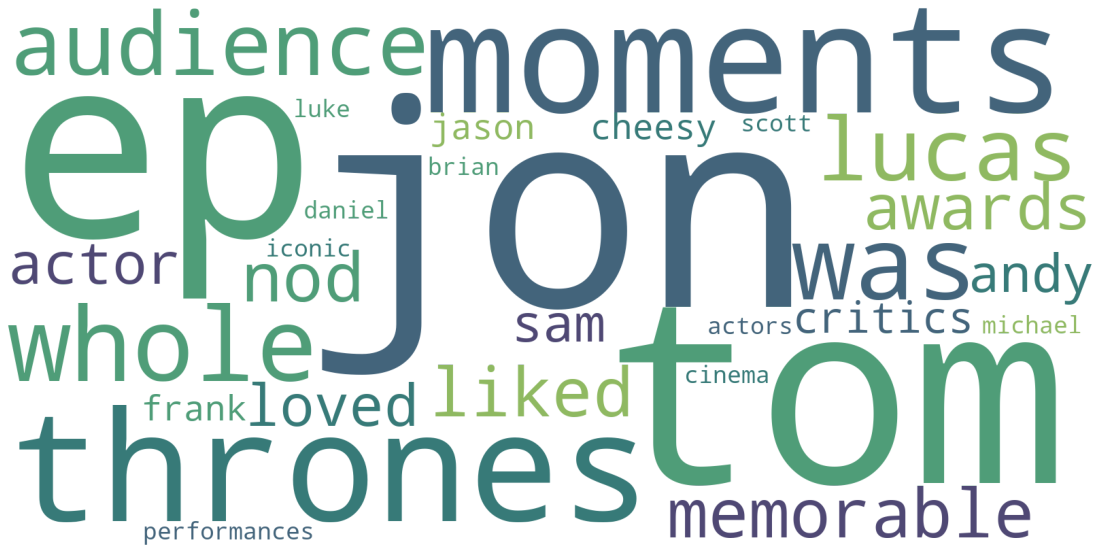

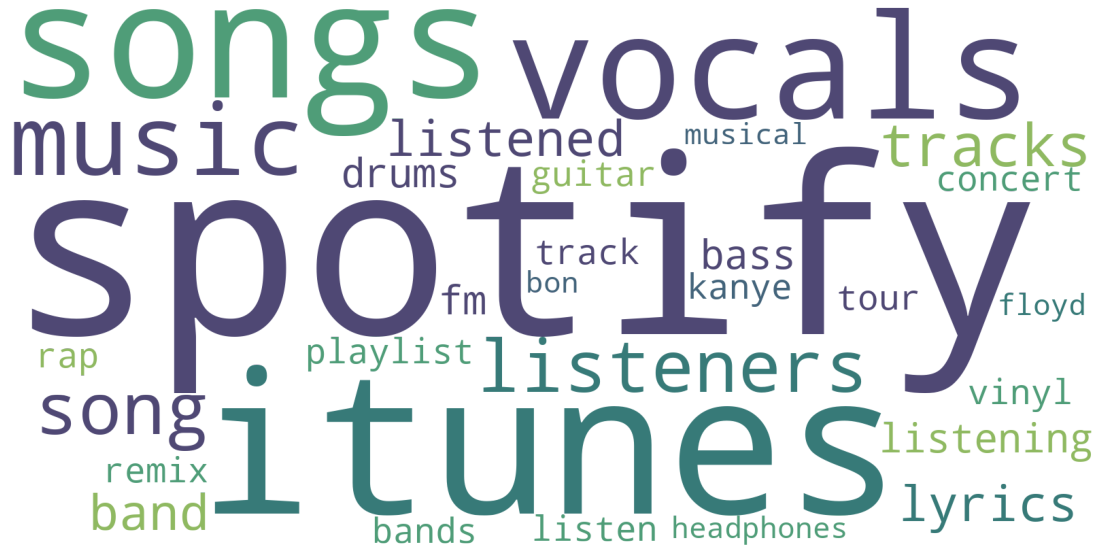

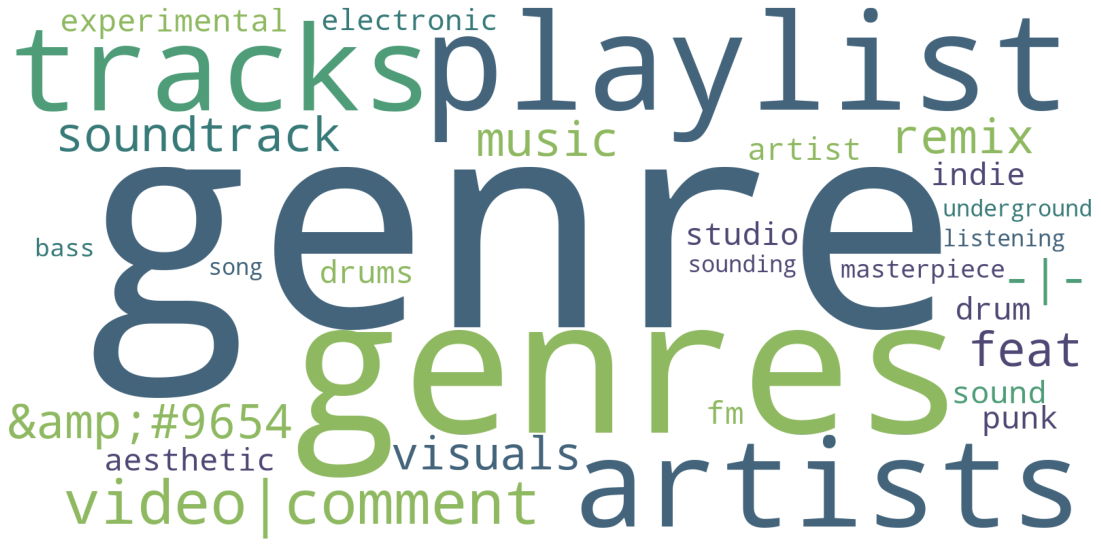

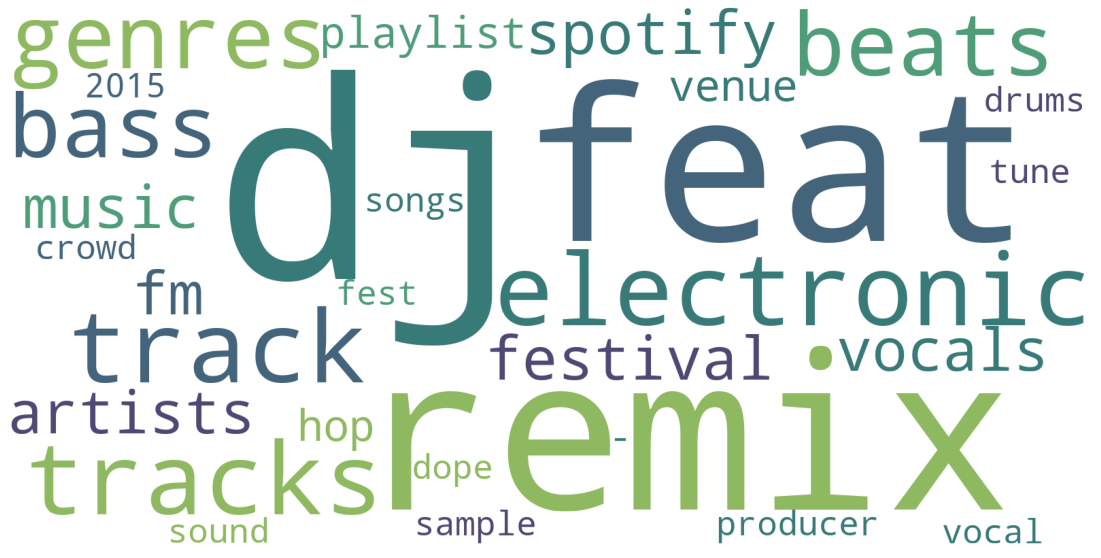

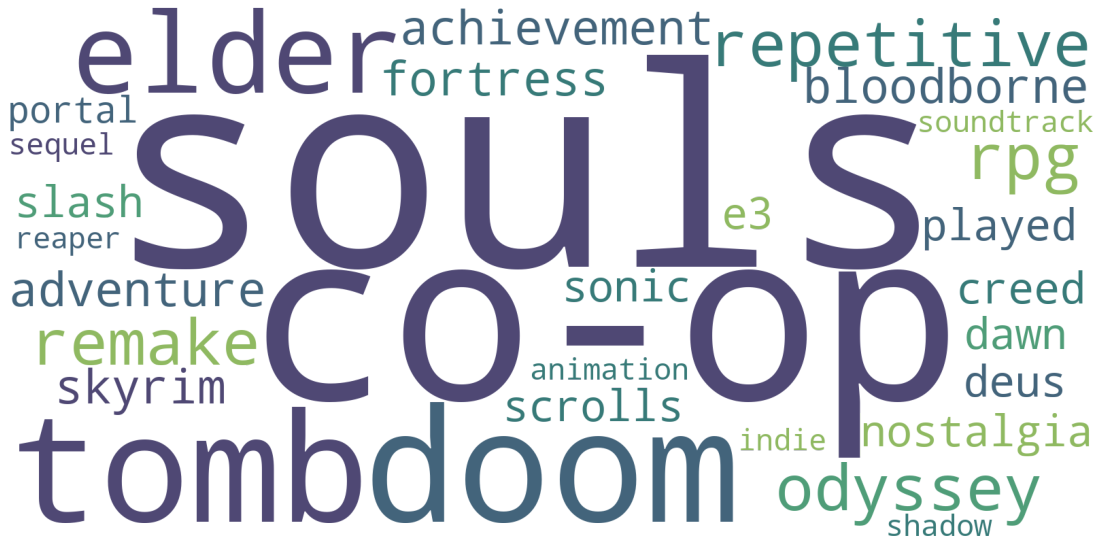

In [31]:
from sklearn.metrics import pairwise


df=pd.DataFrame(pairwise.cosine_similarity(data, genre_vectors))
df.columns=genre_vectors.index

df.index=data.index
df.loc[df.index == '💰'] = 0
df.loc[df.index == '◕'] = 0
df.loc[df.index=='🤔'] = 0



ind = df.index 
genres=df.columns

genres=genres.dropna()

## create the wordcloud 


from wordcloud import WordCloud


# for g in genres: 
for g in genres:
    wc = WordCloud(width=1600, height = 800, relative_scaling=1, max_words= 30, prefer_horizontal = 1,background_color="rgba(255, 255, 255, 0)", mode="RGBA", colormap=my_cmap)#, colormap=cmap)
    weights = df[g].values 
    vals = {}
    for a,b in zip(ind,weights):
        vals.update({a:b})
    wordcloudd = wc.generate_from_frequencies(vals)
    plt.figure(figsize=[20,10])
#     wc.recolor(color_func=cmap, random_state=3)
    plt.imshow(wordcloudd)
    plt.axis('off')
    plt.savefig('visuals\\wordcloud\\cmap_word_cloud_{}'.format(g.replace('/','').replace('.', '').replace(' ','')),bbox_inches = 'tight')

plt.show()

